### AUTHOR : VAISHNAV KRISHNA P
### DATASET SOURCE : KAGGLE 
#### Kaggle Link: https://www.kaggle.com/code/tanmaynema/sba-loan-approval-analysis-prediction/notebook
#### ABOUT DATASET :
In this project, we have analysed and predicted loan approval status based on various parameters for the Small Business Administration (SBA). We use various python libraries to preprocess the dataset, and the dataset was imported from kaggle. The initial pre-processing of the dataset was inspired from Kevin Miller. Further model training was performed into predicting the best result for the loan approval.

In [624]:
# importing necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# ignoring the unnecessory libraries 
import warnings 
warnings.filterwarnings(action='ignore')

# to print all the rows and columns 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [625]:
# importing the dataset 
df = pd.read_csv('SBAnational.csv')

In [626]:
# shape of the dataset 
df.shape

(899164, 27)

* Since the datset is very huge we cannot use the entire the data at a time. we are reducing the amount pf rows just for the simplicity purpose

In [627]:
# Taking the first 100000 rows 
df = df[:100000]

In [628]:
df.shape

(100000, 27)

In [629]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [630]:
# Description about the dataset 
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.375723e+09,48875.896310,405030.173210,91.887250,9.637800,1.315500,1.099990,3.481710,1735.091460,0.778230
std,2.157975e+08,31219.164465,255158.512981,68.187846,94.283457,0.466778,5.910504,13.693279,10184.774948,0.634706
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.187753e+09,19904.000000,236220.000000,58.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.386240e+09,46077.000000,448120.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.562678e+09,78744.000000,561621.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000
max,1.739754e+09,99999.000000,928120.000000,461.000000,9999.000000,2.000000,1000.000000,3225.000000,91999.000000,2.000000


In [631]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      100000 non-null  int64  
 1   Name               99994 non-null   object 
 2   City               99999 non-null   object 
 3   State              99998 non-null   object 
 4   Zip                100000 non-null  int64  
 5   Bank               99893 non-null   object 
 6   BankState          99893 non-null   object 
 7   NAICS              100000 non-null  int64  
 8   ApprovalDate       100000 non-null  object 
 9   ApprovalFY         100000 non-null  object 
 10  Term               100000 non-null  int64  
 11  NoEmp              100000 non-null  int64  
 12  NewExist           100000 non-null  float64
 13  CreateJob          100000 non-null  int64  
 14  RetainedJob        100000 non-null  int64  
 15  FranchiseCode      100000 non-null  int64  
 16  Urb

* From the above analysis.we undestood that there are many missing values in the dataframe 

### EDA 
1. MISSING VALUE ANALYSIS 
2. NUMERICAL FEATURE ANALYSIS 
3. CATEGORICAL FEATURE ANALYSIS 
4. CORELATION ANALYSIS 
5. OUTLIER ANALYSIS 
6. DATA VISUALISATION

### MISSING VALUE ANALYSIS 

In [632]:
# Number of Missing values  
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     6
City                     1
State                    2
Zip                      0
Bank                   107
BankState              107
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr               15
LowDoc                   0
ChgOffDate           74571
DisbursementDate       156
DisbursementGross        0
BalanceGross             0
MIS_Status             728
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

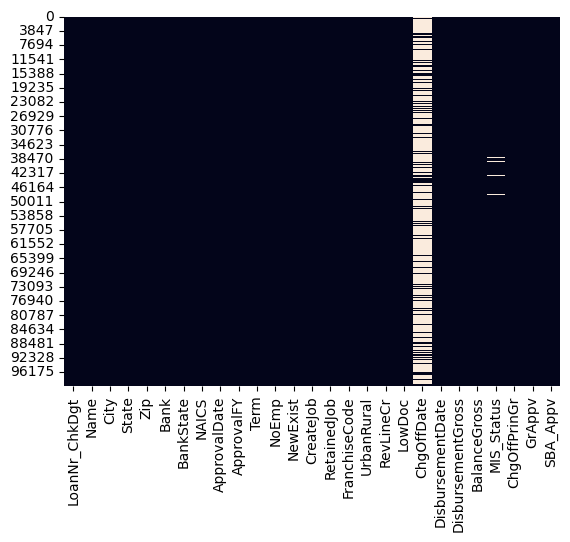

In [633]:
# Heat map for the visualisation of the missing values 
plt.plot("HEATMAP: MISSING VALUE COUNT")
sns.heatmap(df.isnull(),cbar = False)
plt.show()

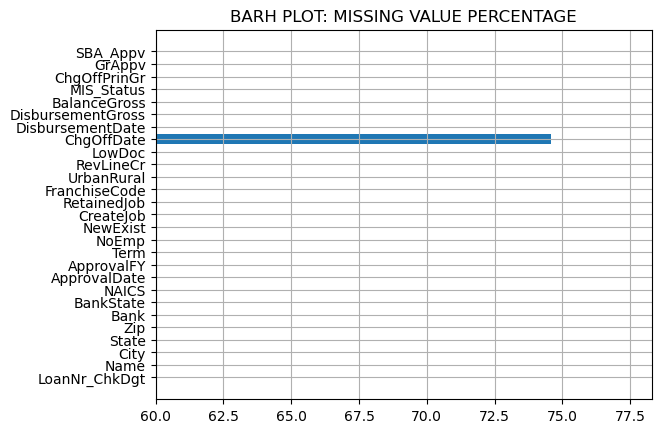

In [634]:
# Percentage of missing values in the features 
plt.title("BARH PLOT: MISSING VALUE PERCENTAGE")
plt.barh((df.isnull().sum()/len(df) * 100).index,(df.isnull().sum()/len(df) * 100).values)
plt.xlim(60,)
plt.grid(True)
plt.show()

* Majority of the features are having only less missing values.But the feature named ChgOffDate has very high missing value ie, about of 75%

### CHECKING FOR DUPLICATE ROWS 

In [635]:
# checking for dupliacate rows 
df.duplicated().sum()

0

### ANALYSIS OF NUMERICAL FEATURES 

In [636]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [637]:
# Numerical features 
Numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [638]:
Numerical_features

['LoanNr_ChkDgt',
 'Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural']

In [639]:
df[Numerical_features].head()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
0,1000014003,47711,451120,84,4,2.0,0,0,1,0
1,1000024006,46526,722410,60,2,2.0,0,0,1,0
2,1000034009,47401,621210,180,7,1.0,0,0,1,0
3,1000044001,74012,0,60,2,1.0,0,0,1,0
4,1000054004,32801,0,240,14,1.0,7,7,1,0


In [640]:
# printing for every feature no of missing value and no of unique values 
for feature in Numerical_features:
    print("{}:No of missing values:{} No of unique values:{}".format(feature,df[feature].isnull().sum(),df[feature].nunique()))

LoanNr_ChkDgt:No of missing values:0 No of unique values:100000
Zip:No of missing values:0 No of unique values:16864
NAICS:No of missing values:0 No of unique values:1142
Term:No of missing values:0 No of unique values:334
NoEmp:No of missing values:0 No of unique values:266
NewExist:No of missing values:0 No of unique values:3
CreateJob:No of missing values:0 No of unique values:83
RetainedJob:No of missing values:0 No of unique values:149
FranchiseCode:No of missing values:0 No of unique values:862
UrbanRural:No of missing values:0 No of unique values:3


In [641]:
df['UrbanRural'].value_counts()

1    54797
0    33690
2    11513
Name: UrbanRural, dtype: int64

In [642]:
df['NewExist'].value_counts()

1.0    68258
2.0    31646
0.0       96
Name: NewExist, dtype: int64

In [643]:
df[Numerical_features].describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.375723e+09,48875.896310,405030.173210,91.887250,9.637800,1.315500,1.099990,3.481710,1735.091460,0.778230
std,2.157975e+08,31219.164465,255158.512981,68.187846,94.283457,0.466778,5.910504,13.693279,10184.774948,0.634706
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.187753e+09,19904.000000,236220.000000,58.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.386240e+09,46077.000000,448120.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.562678e+09,78744.000000,561621.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000
max,1.739754e+09,99999.000000,928120.000000,461.000000,9999.000000,2.000000,1000.000000,3225.000000,91999.000000,2.000000


* From the above output:
    - All the Numerical feature are not having any kind of missing values 
    - LoanNr_ChkDgt: is a constant features 
    - NewExist, UrbanRural: are categorical features

### CATEGORICAL FEATURE ANALYSIS 

In [644]:
# Extracting the ctargorical features from the dataset 
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [645]:
# Categorical features 
Categorical_features

['Name',
 'City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

In [646]:
print("NO of Categorical features: ",len(Categorical_features))

NO of Categorical features:  17


In [647]:
df[Categorical_features].head()

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,28-Feb-97,1997,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,28-Feb-97,1997,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,28-Feb-97,1997,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,1997,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,1997,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [648]:
for feature in Categorical_features:
    print("{}: No ofcategories: {}".format(feature,df[feature].nunique()))

Name: No ofcategories: 94162
City: No ofcategories: 13032
State: No ofcategories: 51
Bank: No ofcategories: 2520
BankState: No ofcategories: 52
ApprovalDate: No ofcategories: 2002
ApprovalFY: No ofcategories: 21
RevLineCr: No ofcategories: 7
LowDoc: No ofcategories: 3
ChgOffDate: No ofcategories: 3739
DisbursementDate: No ofcategories: 1536
DisbursementGross: No ofcategories: 27180
BalanceGross: No ofcategories: 3
MIS_Status: No ofcategories: 2
ChgOffPrinGr: No ofcategories: 19331
GrAppv: No ofcategories: 4724
SBA_Appv: No ofcategories: 6320


In [649]:
df["MIS_Status"].value_counts()

P I F     74858
CHGOFF    24414
Name: MIS_Status, dtype: int64

In [650]:
# Missing values of each categories 
for feature in Categorical_features:
    print("{}:NO of missing values {}".format(feature, df[feature].isnull().sum()))

Name:NO of missing values 6
City:NO of missing values 1
State:NO of missing values 2
Bank:NO of missing values 107
BankState:NO of missing values 107
ApprovalDate:NO of missing values 0
ApprovalFY:NO of missing values 0
RevLineCr:NO of missing values 15
LowDoc:NO of missing values 0
ChgOffDate:NO of missing values 74571
DisbursementDate:NO of missing values 156
DisbursementGross:NO of missing values 0
BalanceGross:NO of missing values 0
MIS_Status:NO of missing values 728
ChgOffPrinGr:NO of missing values 0
GrAppv:NO of missing values 0
SBA_Appv:NO of missing values 0


* All other EDA functions will be performed after Data cleaning.Since This dataset requires so much of cleaning 

### DATA CLEANING 
1. Cleaning the Numerical features 
2. Cleaning the Categorical features
3. Missing value handling
4. Noise handling 

#### CLEANING THE NUMERICAL FEATURES

* Removing the constant feature which really doesnot play any kind of role in prediction.

In [651]:
# removing the constant features 
df.drop(columns=['LoanNr_ChkDgt'],inplace=True)

In [652]:
Numerical_features.remove("LoanNr_ChkDgt")
Numerical_features

['Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural']

* NewExist feature is in float.it is a categorical feature with 3 categories 

In [653]:
# Changing the NewExist feature to int type 
df['NewExist'] = df['NewExist'].astype('int')

In [654]:
df[Numerical_features].dtypes

Zip              int64
NAICS            int64
Term             int64
NoEmp            int64
NewExist         int64
CreateJob        int64
RetainedJob      int64
FranchiseCode    int64
UrbanRural       int64
dtype: object

In [655]:
df[Numerical_features].isnull().sum()

Zip              0
NAICS            0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
dtype: int64

* UrbanRural,NewExist are categorical feature later on we will remove from the Numerical feature 

In [656]:
Numerical_features

['Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural']

In [657]:
df['FranchiseCode'].value_counts()

1        62341
0        33994
78760      236
68020      103
50564       86
25650       56
24850       51
21780       50
72590       48
10528       45
22470       42
52000       39
79140       39
9050        38
67750       33
17998       33
19755       32
68021       30
49952       29
3490        28
35706       27
17205       26
84535       24
52875       24
65150       24
73675       22
20550       22
75900       22
77174       20
53250       20
38605       19
10465       17
1560        17
10734       17
1350        17
73525       17
26650       17
16310       17
83450       16
3512        16
53650       16
18925       16
79153       15
10494       15
81550       14
66910       14
66320       14
73900       14
45150       13
66345       13
39555       13
79902       13
68250       13
61901       13
75000       13
82360       13
68150       13
21425       13
43552       12
21420       12
75710       12
38510       12
33750       12
34850       12
66615       12
6560        11
29600     

In [658]:
# Removing the frenchise code feature since majority of its value is 0 it is not very important 
df.drop(columns=['FranchiseCode'],inplace=True)

In [659]:
Numerical_features.remove('FranchiseCode')

In [660]:
df['NewExist'].value_counts()

1    68258
2    31646
0       96
Name: NewExist, dtype: int64

In [661]:
# changing the noise 0 to most frequent value
for i in range(len(df)):
    if df['NewExist'].iloc[i] == 0:
        df['NewExist'].iloc[i] = 1

#### CLEANING THE CATEGORICAL FEATURES

In [662]:
Categorical_features

['Name',
 'City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

* Name doesnot play a very essential role in the prediction.so we are removing the name features
* Also, more than 75% of the ChgOffDate feature is missing.so we are removing tht feature also.

In [663]:
# Removing the irrelevant features
df.drop(columns=['ChgOffDate','Name'],inplace=True)

In [664]:
Categorical_features.remove('ChgOffDate')
Categorical_features.remove('Name')

In [665]:
df.shape

(100000, 23)

In [666]:
# ignoring the tuples where the target feature is unknown 
df = df[~df['MIS_Status'].isna()]
df = df[~df['DisbursementDate'].isna()]

In [667]:
df.shape 

(99155, 23)

In [668]:
Missing_value_features = [feature for feature in Categorical_features if df[feature].isna().sum() > 0]

In [669]:
Missing_value_features

['City', 'State', 'Bank', 'BankState', 'RevLineCr']

In [670]:
for feature in Missing_value_features:
    df[feature].fillna(df[feature].value_counts().index[0], inplace=True)

In [671]:
df[Categorical_features].isna().sum()

City                 0
State                0
Bank                 0
BankState            0
ApprovalDate         0
ApprovalFY           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

* All the missing values are handled

#### NOISE HANDLING 

In [672]:
Categorical_features

['City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'RevLineCr',
 'LowDoc',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

In [673]:
# Temporal features
Temporal_features = ['DisbursementDate','ApprovalDate']

for feature in Temporal_features:
    Categorical_features.remove(feature)

In [674]:
for feature in Temporal_features:
    df[feature] = pd.to_datetime(df[feature], dayfirst=True)

In [675]:
df[Temporal_features].head()

,DisbursementDate,ApprovalDate
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28


In [676]:
df['RevLineCr'] = df['RevLineCr'].map({"N":"N",'Y':"Y"})

In [677]:
df['RevLineCr'] = df['RevLineCr'].fillna('UnKnown')

In [678]:
df['RevLineCr'].value_counts()

N          49492
Y          32257
UnKnown    17406
Name: RevLineCr, dtype: int64

In [679]:
df['LowDoc'] = df['LowDoc'].str.replace("C",'UnKnown')

In [680]:
df['LowDoc'].value_counts()

N          90878
Y           8246
UnKnown       31
Name: LowDoc, dtype: int64

In [681]:
df['MIS_Status'].value_counts()

P I F     74792
CHGOFF    24363
Name: MIS_Status, dtype: int64

In [682]:
df[Categorical_features].head()

,City,State,Bank,BankState,ApprovalFY,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,FIFTH THIRD BANK,OH,1997,N,Y,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,1ST SOURCE BANK,IN,1997,N,Y,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,1997,N,N,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,1997,N,Y,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,1997,N,N,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [683]:
Price_features = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']

In [684]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace("$",'').str.replace(",",'').str.replace(" ",'')

In [685]:
df['DisbursementGross'] = df['DisbursementGross'].astype('float')

In [686]:
df['BalanceGross'].value_counts()

$0.00           99153
$12,750.00          1
$827,875.00         1
Name: BalanceGross, dtype: int64

* feature, BalanceGross majority of its value is 0.It is not a relavant feature 

In [687]:
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace("$",'').str.replace(",",'').str.replace(" ",'')

In [688]:
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].astype('float')

In [689]:
df['GrAppv'] = df['GrAppv'].str.replace("$",'').str.replace(",",'').str.replace(" ",'')

In [690]:
df['GrAppv'] = df['GrAppv'].astype('float')

In [691]:
df['SBA_Appv'] = df['SBA_Appv'].str.replace("$",'').str.replace(",",'').str.replace(" ",'')

In [692]:
df['SBA_Appv'] = df['SBA_Appv'].astype('float')

In [693]:
df.drop(columns=['BalanceGross'],inplace=True)

In [694]:
for feature in Price_features:
    Numerical_features.append(feature)
    Categorical_features.remove(feature)

In [695]:
# Numerical features 
Numerical_features.remove('BalanceGross')

In [696]:
Categorical_features.remove('ApprovalFY')
Numerical_features.append('ApprovalFY')

### DATA TRANSFORMATION
* Encoding the categorical features based on the concept of hashmap

In [697]:
# Encoding the catgeorical features 
dictionary = {}

for feature in Categorical_features:
    c = 1
    dictionary[feature] = {}
    for unique_val in df[feature].unique():
        dictionary[feature][unique_val] = c
        c += 1

In [698]:
dictionary

{'City': {'EVANSVILLE': 1,
  'NEW PARIS': 2,
  'BLOOMINGTON': 3,
  'BROKEN ARROW': 4,
  'ORLANDO': 5,
  'PLAINVILLE': 6,
  'UNION': 7,
  'SUMMERFIELD': 8,
  'PORT SAINT JOE': 9,
  'GLASTONBURY': 10,
  'CHARLOTTE': 11,
  'CHICAGO': 12,
  'APEX': 13,
  'SLATERSVILLE': 14,
  'WINSTON-SALEM': 15,
  'OKLAHOMA CITY': 16,
  'MIDLAND': 17,
  'CENTREVILLE': 18,
  'PLANO': 19,
  'KNOXVILLE': 20,
  'DUMAS': 21,
  'CORAL SPRINGS': 22,
  'JOHNSTON': 23,
  'EULESS': 24,
  'LITTLE ROCK': 25,
  'SAINT PETER': 26,
  'INDEPENDENCE': 27,
  'MARSHFIELD': 28,
  'CAMARILLO': 29,
  'ANDERSON': 30,
  'MIAMI': 31,
  'DALLAS': 32,
  'NEW ORLEANS': 33,
  'WASHINGTON': 34,
  'LEANDER': 35,
  'ROANOKE': 36,
  'KINSMAN': 37,
  'NORTH EASTON': 38,
  'SPRINGFIELD': 39,
  'LEWISBURG': 40,
  'LOUISVILLE': 41,
  'LELAND': 42,
  'EDINBURGH': 43,
  'Newburgh': 44,
  'Dover (census name for Dover C': 45,
  'SMITHVILLE': 46,
  'Chicago': 47,
  'Marina del Ray': 48,
  'WINSOR MILL': 49,
  'SPOTSYLVANIA': 50,
  'Fall River': 

In [699]:
# Encoding the categorical features 
for feature in Categorical_features:
    df[feature] = df[feature].map(dictionary[feature])

In [700]:
df[Categorical_features].head()

,City,State,Bank,BankState,RevLineCr,LowDoc,MIS_Status
0,1,1,1,1,1,1,1
1,2,1,2,2,1,1,1
2,3,1,3,2,1,2,1
3,4,2,4,3,1,1,1
4,5,3,5,4,1,2,1


### FEATURE ENGINEERING 
* Making some features from the temporal features 



In [701]:
Temporal_features 

['DisbursementDate', 'ApprovalDate']

In [702]:
df[Temporal_features].head()

,DisbursementDate,ApprovalDate
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28


In [703]:
df['AppYear'] = df['ApprovalDate'].dt.year
df['AppMonth'] = df['ApprovalDate'].dt.month
df['Dismonth'] = df['DisbursementDate'].dt.month

In [704]:
# adding to Numerical features
Numerical_features.extend(['AppYear','AppMonth','Dismonth'])

In [705]:
df['NewExist'].value_counts()

1    67796
2    31359
Name: NewExist, dtype: int64

In [706]:
# since the New exist is a categorical feature remving from the numerical feature and adding in categoriacl feature 
Numerical_features.remove('NewExist')
Categorical_features.append('NewExist')

In [707]:
df.drop(columns=Temporal_features,inplace=True)

### DATA VISUALISATION

In [708]:
Numerical_features

['Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'CreateJob',
 'RetainedJob',
 'UrbanRural',
 'DisbursementGross',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'ApprovalFY',
 'AppYear',
 'AppMonth',
 'Dismonth']

In [709]:
df[Numerical_features].head()

,Zip,NAICS,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalFY,AppYear,AppMonth,Dismonth
0,47711,451120,84,4,0,0,0,60000.0,0.0,60000.0,48000.0,1997,1997,2,2
1,46526,722410,60,2,0,0,0,40000.0,0.0,40000.0,32000.0,1997,1997,2,5
2,47401,621210,180,7,0,0,0,287000.0,0.0,287000.0,215250.0,1997,1997,2,12
3,74012,0,60,2,0,0,0,35000.0,0.0,35000.0,28000.0,1997,1997,2,6
4,32801,0,240,14,7,7,0,229000.0,0.0,229000.0,229000.0,1997,1997,2,5


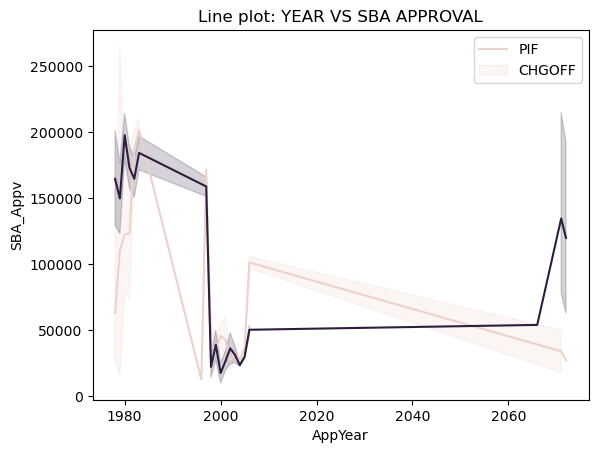

In [710]:
plt.title("Line plot: YEAR VS SBA APPROVAL")
sns.lineplot(data=df,x='AppYear',y='SBA_Appv',hue='MIS_Status')
plt.legend(labels = ['PIF',"CHGOFF"])
plt.show()

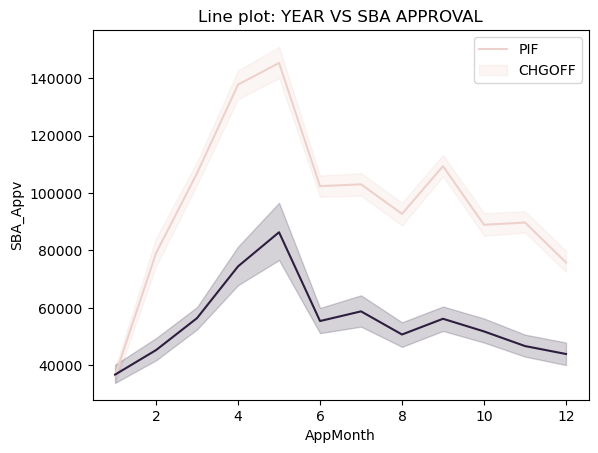

In [711]:
plt.title("Line plot: Month VS SBA APPROVAL")
sns.lineplot(data=df,x='AppMonth',y='SBA_Appv',hue='MIS_Status')
plt.legend(labels = ['PIF',"CHGOFF"])
plt.show()

### CORELATION MATRIX

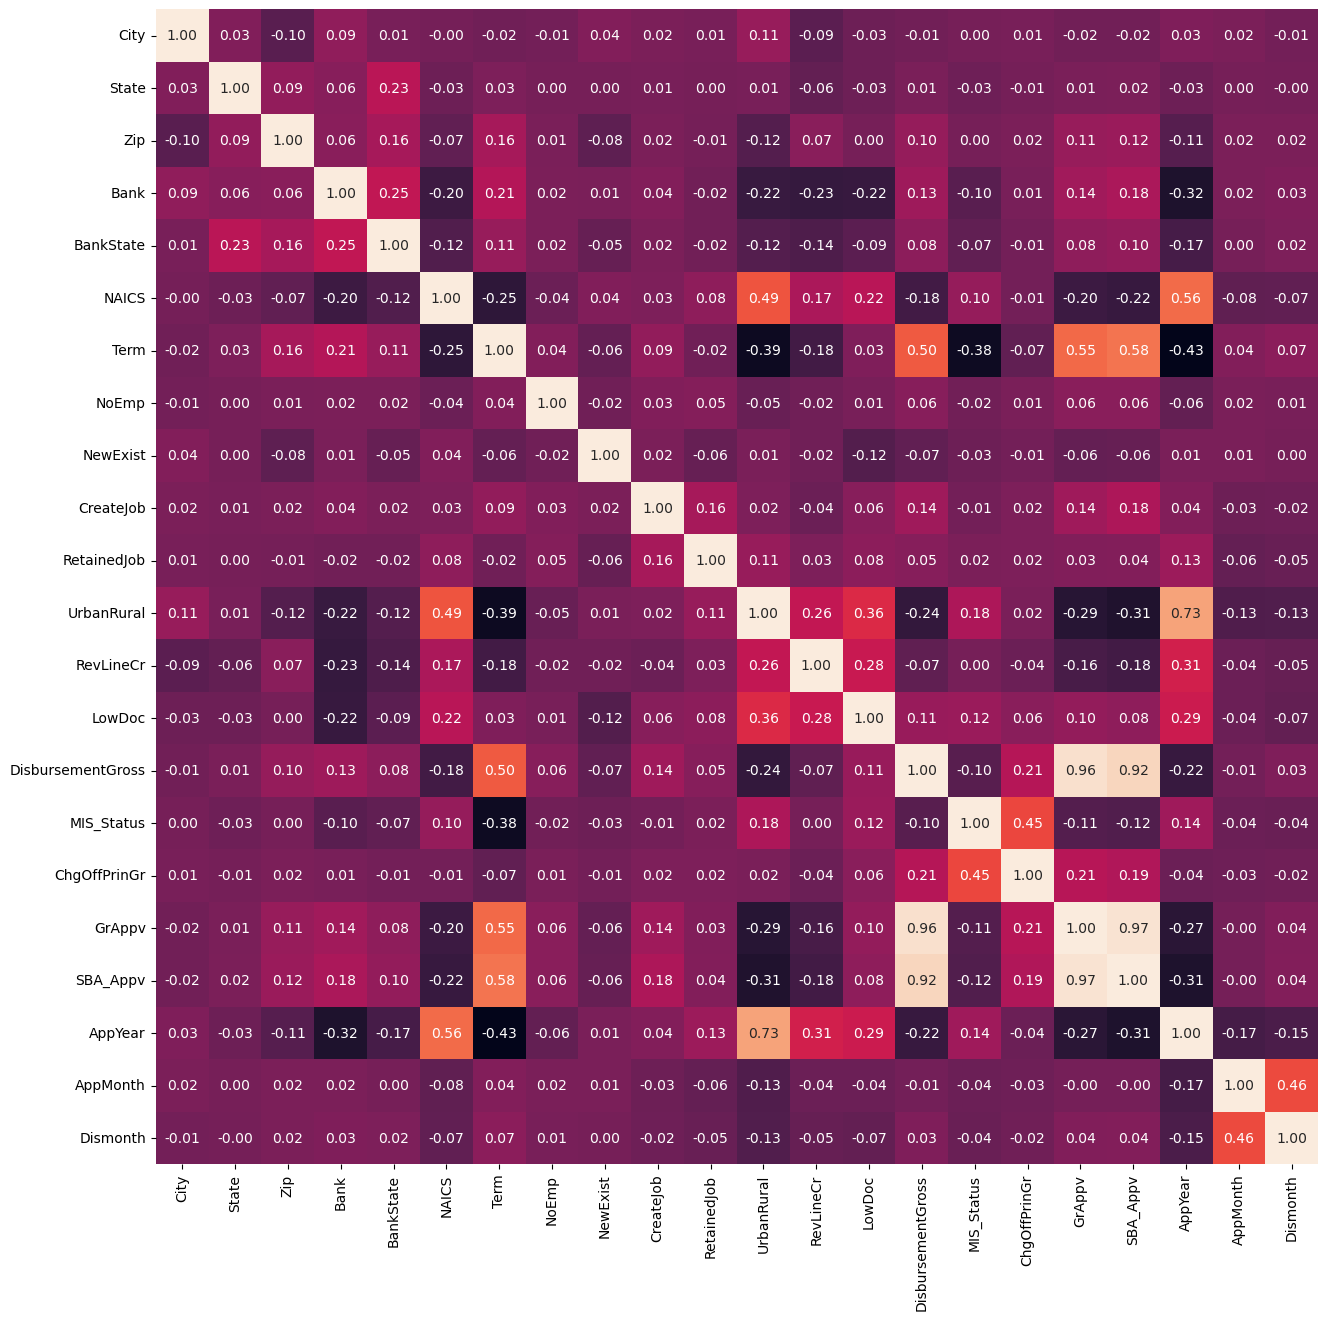

In [712]:
# corelation matrix 
plt.figure(figsize=(15,15))
plt.plot("HEAT MAP:CORELATION MATRIX ")
sns.heatmap(df.corr(),annot=True,cbar=False,fmt='0.2f')
plt.show()

* city has no corelation with the target feature
* multicolinear features GrAppv,DisbusmentGross

In [713]:
# features multicolinear
df.drop(columns=['City','DisbursementGross','GrAppv'],inplace=True)

In [714]:
# Removing the list 
Categorical_features.remove('City')
Numerical_features.remove('DisbursementGross')
Numerical_features.remove('GrAppv')

In [715]:
len(Numerical_features),len(Categorical_features),len(df.columns)

(13, 7, 20)

Accuracy: 0.9906207452977661


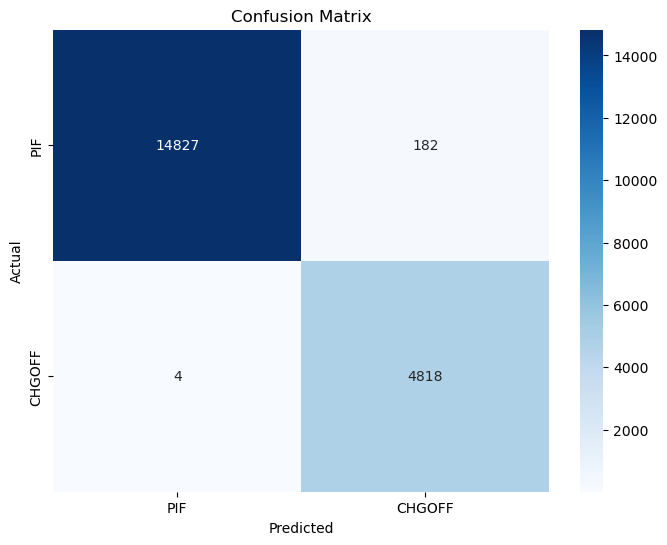

In [716]:
# Splitting the DataFrame into features (X) and target variable (y)
X = df.drop(columns=['MIS_Status'])  # Features
y = df['MIS_Status']  # Target

# Splitting the data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the validation set
y_pred = rf_classifier.predict(X_valid)

# Calculating accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

# Creating confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['PIF', 'CHGOFF'], yticklabels=['PIF', 'CHGOFF'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [720]:
print("CLASSIFICATION REPORT")
print(classification_report(y_valid,y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       1.00      0.99      0.99     15009
           2       0.96      1.00      0.98      4822

    accuracy                           0.99     19831
   macro avg       0.98      0.99      0.99     19831
weighted avg       0.99      0.99      0.99     19831

